## 12.1 Introduction
2 basic concepts of high-level language programming, variables and operators
- **variables** hold the values upon which a program acts
- **operators** are the language mechanisms for manipulating these values

## 12.2 Variables
A value is any data item upon which a program performs an operation

Examples of values:
- the iteration counter for a loop, an input value entered by a user
- the partial sum of a series of numbers that are being added together.

Programmers spend a lot of effort keeping track of these values.


Because values are such an important programming concept, high-level languages try to make the process of managing them easier on the programmer. 

High-level languages allow the programmer to refer to values symbolically, by a name rather than a memory location
- whenever we want to operate on the value, the language will automatically generate the proper sequence of data movement operations.
- need not worry about where in memory to store a value or about juggling the value between memory and the registers.

In high-level languages, these symbolically named values are called variables. 


In order to properly track the variables in a program, the high-level language translator (the C compiler) needs to know several characteristics
about each variable. 
- the symbolic name of the variable
- what type of information the variable will contain
- where in the program the variable will be accessible.

In most languages C included, this information is provided by the variable's declaration.

    int echo;

- Based on this declaration, the compiler reserves an integer's worth of memory for echo (sometimes, the compiler can optimize the program such that echo is stored in a register and therefore does not require a memory location). 
- Whenever echo is referred to in the subsequent C code, the compiler generates the-  appropriate machine code to access it. 


### 12.2.1 Three Basic Data Types: int, char, double 
the meaning of a particular bit pattern depends on the data type imposed on the pattern.

Eg: the binary pattern `0110 0110` might represent the lowercase f or it might represent the decimal number 102, depending on whether we treat the pattern as an ASCII data type or as a 2's complement integer data type.

A variable's declaration informs the compiler about the variable's type

The compiler uses a variable's type information to allocate a proper amount of storage for the variable. Also, type indicates how operations on the variable are to be performed at the machine level.

C supports three basic data types: integers, characters, and floating point numbers
- Variables of these types can be created with the type specifiers `int`, `char`, and `double` (which is short for double-precision floating point). 

**int** - In most cases, an int is a 2's complement integer in the word length of the underlying ISA. 

**Eg:** an integer variable called numberOfSeconds. When the compiler sees this declaration, the compiler sets aside enough storage for this variable (in the case of the LC-3, one memory location).

    int numberOfSeconds; 

**char** - Although eight bits are sufficient to hold an ASCII character, for purposes of making the examples in this textbook less cluttered, all char variables will occupy 16 bits. That is, chars, like ints, will each occupy one memory location

**Eg:**

    char lock;
    char key = 'Q'; 

**double** - allows us to declare variables of the floating point type

Recall: at the lowest level, a floating point number is a bit pattern that has three parts: a sign, a fraction, and an exponent.

**Eg:**

    double costPerLiter;
    double electronsPerSecond;
    double averageTemp;

Floating point literals are represented containing either a decimal point or an exponent, or both

The exponent is signified by the character e or E and can be positive or negative

It represents the power of 10 by which the fractional part (the part that precedes the e or E) is multiplied.

    double twoPointOne = 2.1; /* This is 2.1 */
    double twoHundredTen = 2.1E2; /* This is 210.0 */
    double twoHundred = 2E2; /* This is 200.0 */
    double twoTenths = 2E-1; /* This is 0.2 */
    double minusTwoTenths = -2E-1; /* This is -0.2 */ 

Another floating point type specifier in C is called **float**. It declares a singleprecision floating point variable; **double** creates one that is double precision. 

Recall: the precision of a floating point number depends on the number of bits of the representation allocated to the fraction

The size of the double is dependent upon the ISA and the compiler. Usually, a double is 64 bits long and a float is 32 bits in compliance with the IEEE 754 floating point standard. 



### 12.2.2 Choosing Identifiers 
C will treat Capital and capital as different indentifiers

Variables beginning with an underscore (e.g., index ) conventionally are used only in special library code

Variables are almost never declared in all uppercase letters. The convention of all uppercase is used solely for symbolic values created using the preprocessor directive #define

### 12.2.3 Scope: Local versus Global 
As we mentioned, a variable's declaration assists the compiler in managing the storage of that variable. 

In C, a variable's declaration conveys three pieces of information to the compiler: the variable's identifier, its type, and its scope. 
- The first two of these, identifier and type, the C compiler gets explicitly from the variable's declaration. 
- The third piece, scope, the compiler infers from the position of the declaration within the code.

The scope of a variable is the region of the program in which the variable is "alive" and accessible. 

in C, there are only two basic types of scope for a variable - global to the entire program, or it is local, or private, to a particular block of code. 

#### Local Variables 
In C, all variables must be declared before they can be used. 

In fact, some variables must be declared at the beginning of the block in which they appear—these are called local variables. 

In C, a block is any subsection of a program beginning with the open brace character, { and ending with the closing brace character, }.

It is possible, and sometimes useful, to declare two different variables with the same name within different blocks of the same function. For instance, it might be convenient to use the name count for the counter variable for several different loops within the same program.

#### Global Variables 
can be accessed throughout the program

retain their storage and values throughout the duration of the program

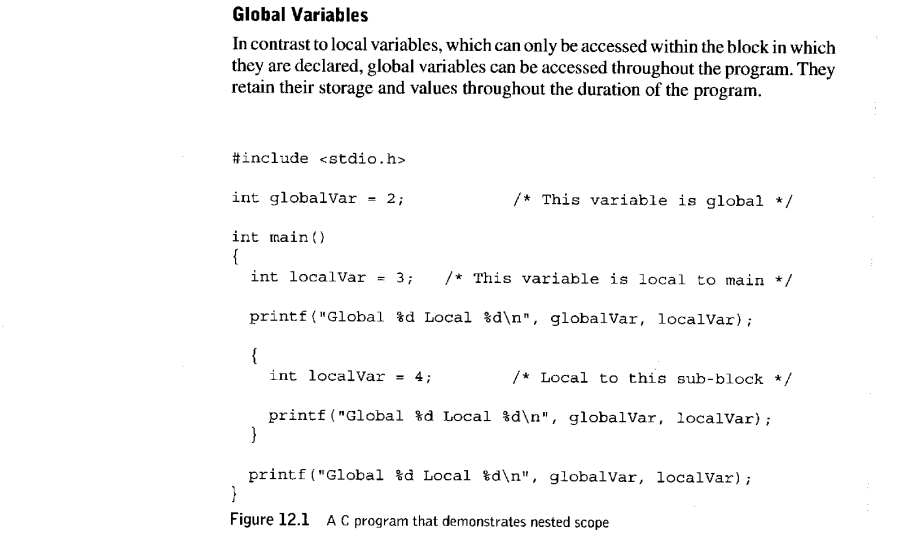

The C program in Figure 12.1 is similar to the previous program except we have added a sub-block within main. 

Within this sub-block, we have declared a new variable localVar. It has the same name as the local variable declared at the beginning of main. Execute this program and you will notice that when the sub-block is executing the prior version of localVar is not visible; that is, the new declaration of a variable of the same name supersedes the previous one. Once the sub-block is done executing, the previous version of localVar becomes visible again. This is an example of what is called **nested scope**. 

#### Initialization of Variables 
**Q) What initial value will a variable have if it has no initializer?**

**A)** In C, by default, local variables start with an **unknown** value
- the storage location a local variable is assigned is not cleared and thus contains whatever last value was stored there
- in C, local variables are uninitialized
- Global variables (and all other static storage class variables) are, in contrast, initialized to 0 when the program starts execution

## 12.3 Operators 
C, like many other high-level languages, supports a rich set of operators that allow the programmer to manipulate variables
- arithmetic
- logic functions
- comparisons

operators allow the programmer to express a computation in a more natural, convenient, and compact way than by expressing it as a sequence of assembly language instructions.

Given some C code, the compiler's job is to take the code and convert it into machine code that the underlying hardware can execute. In the case of a C program being compiled for the LC-3, the compiler must translate whatever operations the program might contain into the instructions of the LC-3 instruction set — clearly not an easy task given that the LC-3 has very few operate instructions.

    z = X * y;

Since there is no single LC-3 instruction to multiply two values, our LC-3 compiler must generate a sequence of code that accomplishes the multiplication of two (possibly negative) integers
- One possible manner in which this can be accomplished is by repeatedly adding the value of x to itself a total of y times

### 12.3.1 Expressions and Statements 
We can combine variables and literal values with operators, such as the multiply operator from the previous example, to form a C expression. 

Eg: `x * y` is an **expression**.

Expressions can be grouped together to form a statement. 

Eg: `z = x * y;` is a **statement**.

Statements in C are like complete sentences in English. Just as a sentence captures a complete thought or action, a C statement expresses a complete unit of work to be carried out by the computer

**All statements in C end with a semicolon character, `;` (or as we'll see in the next paragraph, a closing brace, }**

The semicolon terminates the end of a statement in much the same way a punctuation mark terminates a sentence in English.

One or more simple statements can be grouped together to form a compound statement, or block, by enclosing the simple statements within braces, { }.

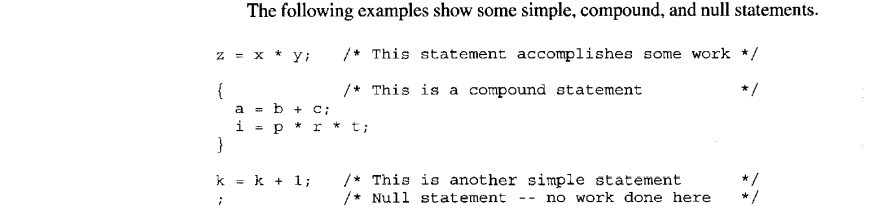

### 12.3.4 Order of Evaluation 
#### Associativity
For operations of equal precedence, their associativity determines the order in which they are evaluated. 

In the case of addition and subtraction, both associate from left to right. Therefore `2 + 3 - 4 + 5` evaluates as if it were `((2 + 3) - 4) + 5`

#### Parentheses
As in arithmetic, evaluation always begins at the innermost set of parentheses

### 12.3.5 Bitwise Operators 
C has a set of operators called bitwise operators that manipulate bits of a value - they perform a logical operation such as AND, OR, NOT, XOR across the individual bits of a value.

Eg: the C bitwise operator & performs an operation similar to the LC-3 AND instruction
- `&` operator performs an AND operation bit by bit across the two input operands
- `|` performs a bitwise OR
- `~` performs a bitwise NOT and takes only one operand (i.e., it is a unary operator)
- `^` performs a bitwise XOR

Examples of expressions using these operators on 16-bit values follow:

    0x1234 | 0x5678 /* equals 0x567C */
    0x1234 & 0x5678 /* equals 0x1230 */
    0x1234 " 0x5678 /* equals 0x444C */
    -0x1234         /* equals OxEDCB */
    1234 & 5678     /* equals 1026 */ 

C's set of bitwise operators includes two **shift operators**: `<<`, which performs a left shift, and `>>`, which performs a right shift. 
- Both are binary operators, meaning they require two operands. The first operand is the value to be shifted and the second operand indicates the number of bit positions to shift by

For all of C's bitwise operators, neither operand can be a floating point value.

### 12.3.6 Relational Operators 
C has several operators to test the relationship between two values. As we will see in the next chapter, these operators are often used in C to generate conditional constructs

### 12.3.7 Logical Operators 
C adopts the notion that a nonzero value (i.e., a value other than zero) is logically true. A value of zero is logically false. 

The logical NOT operator has highest precedence, then logical AND, then logical OR. 

### 12.3.8 Increment/Decrement Operators 

    x = 4 ;
    y = x++;

Here, the integer variable x is incremented. However, the original value of x is assigned to the variable y (i.e., the value of x++ evaluates to the original value of x). After this code executes, the variable y will have the value 4, and x will be 5.

Similarly, the following code increments x.

    X = 4;
    y = ++x;

However with this code, the expression ++x evaluates to the value after the increment. In this case, the value of both y and x will be 5.

## 12.4 Problem Solving Using Operators 
**top-down decomposition** - start with a rough description of the algorithm and refine it by breaking larger steps into smaller ones

Many experienced programmers rely on their understanding of the lower levels of the system to help make good decisions on how to decompose a problem

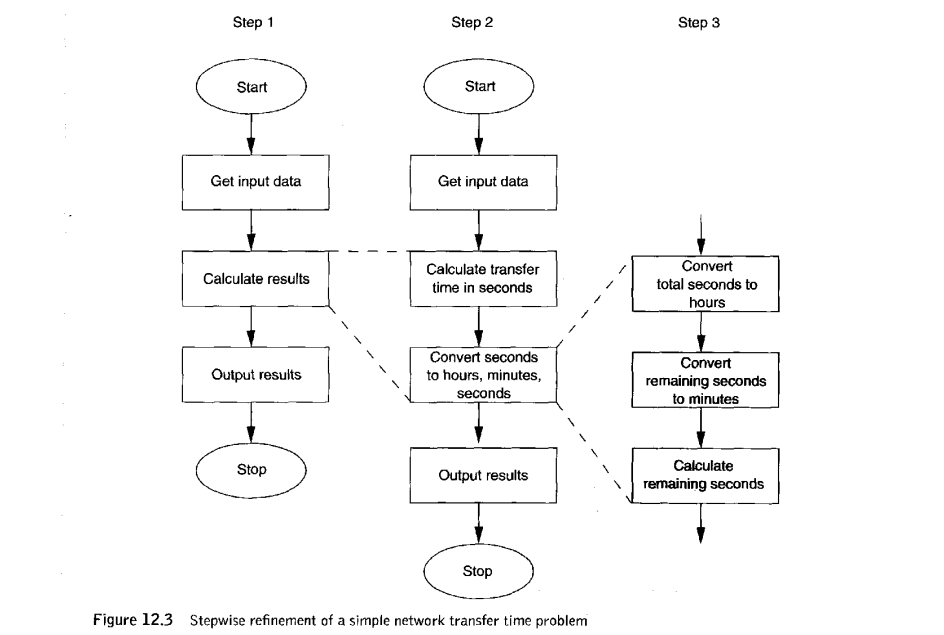



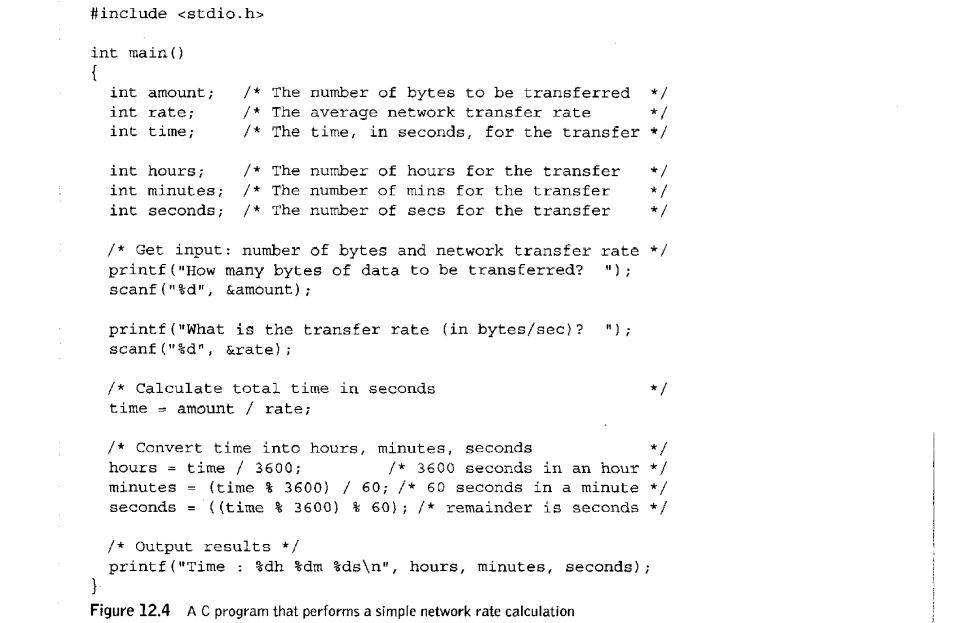



## 12.5 Tying It All Togerher 
Now covered all the basic C types and operators that we plan to use throughout this textbook

Now ready to examine these concepts from the compiler's viewpoint -> How does a compiler translate code containing variables and operators into machine code?

**2 basic mechanisms that help the compiler do its job of translation:**
1. The compiler makes heavy use of a symbol table to keep track of variables during compilation.
2. The compiler also follows a systematic partitioning of memory - it carefully allocates memory to these variables based on certain characteristics, with certain regions of memory reserved for objects of a particular class

### 12.5.1 Symbol Table 
Like the assembler, the C compiler keeps track of variables in a program with a symbol table.

**Whenever the compiler reads a variable declaration, it creates a new entry in its symbol table corresponding to the variable being declared.**

The entry contains enough information for the compiler to manage the storage allocation for the variable and generation of the proper sequence of machine code whenever the variable is used in the program. 

Each symbol table entry for a variable contains:
1. its name
2. its type
3. the place in memory the variable has been allocated storage
4. an identifier to indicate the block in which the variable is declared (i.e., the scope of the variable)

Figure 12.5 shows the symbol table entries corresponding to the variables declared in the network rate calculation program in Figure 12.4. Since this program contains six variables declarations, the compiler ends up with six entries in its symbol table for them.

Notice that the compiler records a variable's location in memory as an offset, with most offsets being negative. This offset indicates the relative position of the variable within the region of memory it is allocated.

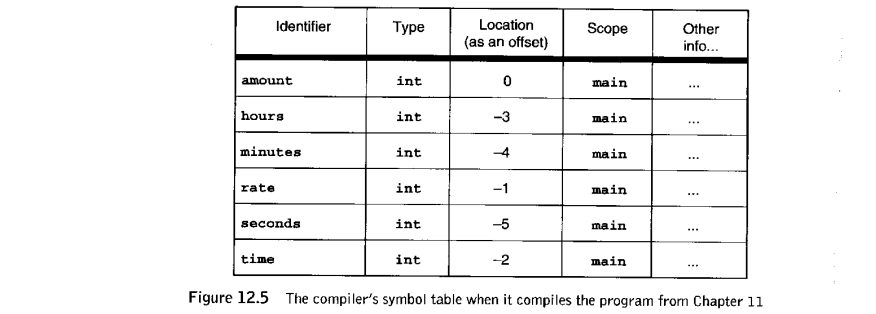

### 12.5.2 Allocating Space for Variables 
2 regions of memory in which C variables are allocated storage: 
1. global data section 
2. the run-time stack

The global data section is where all **global** variables are stored. More generally, it is where variables of the static storage class are allocated. 

The run-time stack is where **local** variables (of the default automatic storage class) are allocated storage.



The **offset field** in the symbol table provides the precise information about where in memory variables are actually stored - indicates how many locations from the base of the section a variable is allocated storage.

**Eg:** if a global variable earth has an offset of `4` and the global data section starts at memory location `0x5000`, then earth is stored in location `0x5004`.

All our examples of compiler-generated machine code use R4 to contain the address of the beginning of the global data section—R4 is referred to as the global pointer. Loading the variable `earth` into R3, for example, can be accomplished with the following LC-3 instruction: 
    
    LDR R3 , R4, #4

If `earth` is instead a local variable, say for example in the function main, the story is slightly more complicated. All local variables for a function are allocated in a "memory template" called an **activation record** or **stack frame**. 

An **activation record** is a region of contiguous memory locations that contains all the local variables for a given function
- Every function has an activation record (or more precisely, every invocation of a function has an activation record—more on this later). 

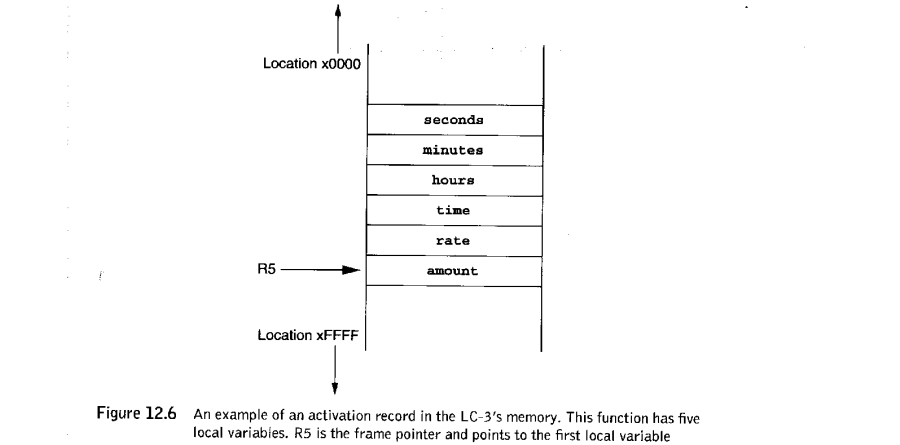

Whenever we are executing a particular function, the highest memory address of the activation record will be stored in R5—R5 is called the **frame pointer**.

Notice that the variables are allocated in the record in the reverse order in which they are declared. Since the variable amount is declared first, it appears nearest to the frame pointer R5. 

If we make a reference to a particular local variable, the compiler will use the
variable's symbol table entry to generate the proper code to access it. In particular,
the offset in the variable's symbol table entry indicates where in the activation
record the variable has been allocated storage. 

To access the variable seconds, the compiler would generate the instruction: `LDR RO, R5, #-5`

Whenever we call a function in C (in C, subroutines are called functions), the activation record for the function is pushed on to the run-time stack. 
The function's activation record is allocated on top of the stack. R5 is appropriately adjusted to point to the base of the record— therefore any code within the function that accesses local variables will now work correctly.

Figure 12.7 shows the organization of the LC-3's memory when a program is running. Many UNIX-based systems arrange their memory space similarly

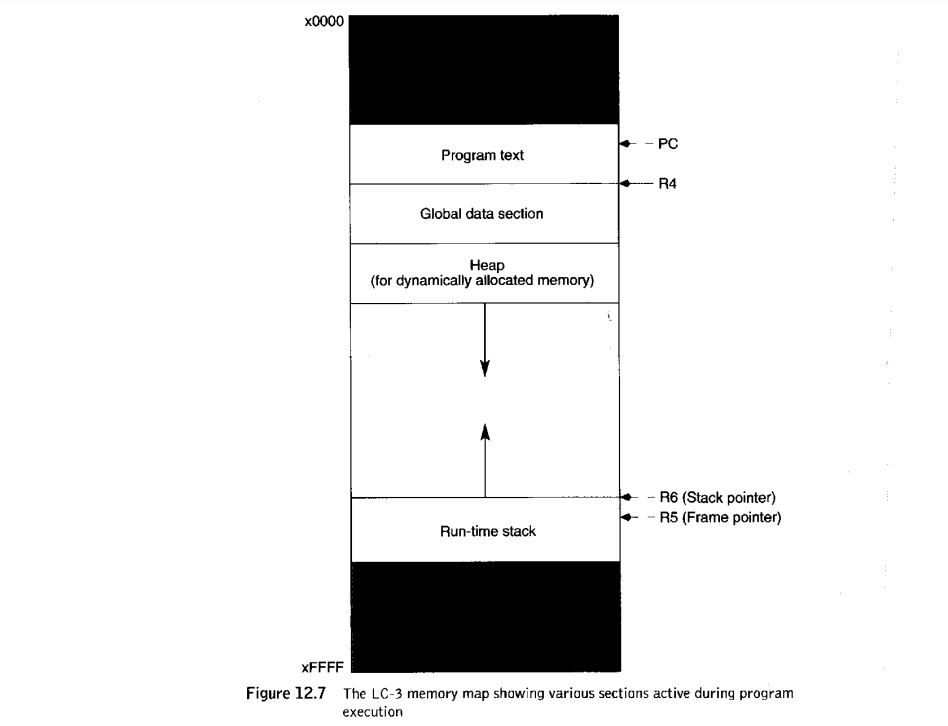

The program itself occupies a region of memory, so does the run-time stack and the global data section. 

There is another region reserved for dynamically allocated data called the heap (we will discuss this region in Chapter 19).

### 12.6.1 Variations of the Three Basic Types 
C gives the programmer the ability to specify larger or smaller sizes for the three basic types int, char, and double. 

The modifiers `long` and `short` can be attached to `int` with the intent of extending or shortening the default size.

**Eg:** a `long int` can declare an integer that has twice the number of bits as a regular int, thereby allowing us to represent a larger range of integers in a C program.

The modifier `short` can be used to create variables that are smaller than the default size, which can be useful when trying to conserve on memory space when handling data that does not require the full range of the default data type

We can declare an unsigned integer using the unsigned type modifier. With unsigned integers, all bits are used to represent nonnegative integers (i.e., positive numbers and zero)

    unsigned int numberOfDays;
    unsigned int populationSize; 

Following are some sample variations of the three basic types:
    
    long int ounces;
    short int gallons;
    long double veryVeryLargeNumber = 4.12936E361;
    unsigned int sizeOfClass = 900;
    float oType = 9.24;
    float tonsOfGrain = 2.998E8; 

### 12.6.2 Literals, Constants, and Symbolic Values 
In C, variables can also be declared as constants by adding the `const` qualifier before the type specifier. These constants are really variables whose values do not change during the execution of a program.

**3 types of constant values that often appear in C code**. 

1. **Literal constants** are unnamed values that appear literally in the source code. In the circle example, the values 2 and 3 .14159 are examples of literal constants.
2. Floating point literals can be the exponential notation
3. The third type of constant value is created using the preprocessor directive `#define`

All three types create values that do not change during the execution of a program.

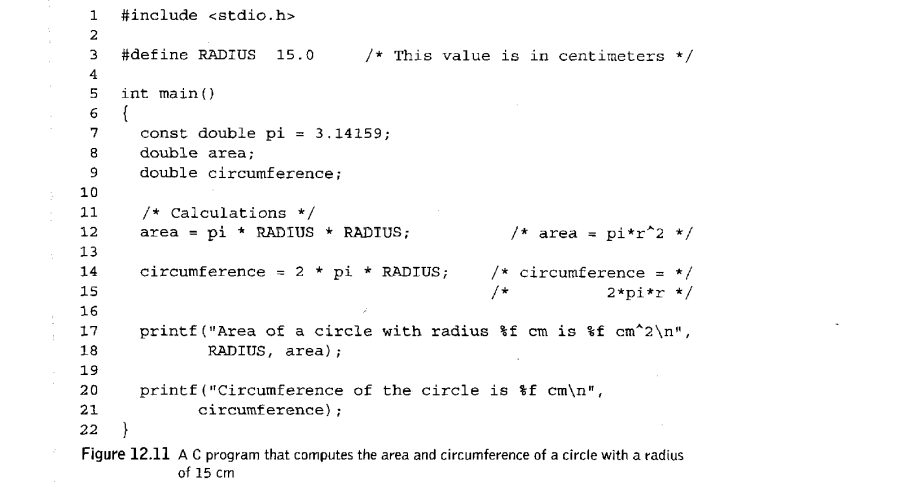

The distinction between constants declared using `const` and symbolic values defined using `#define` might seem a little subtle to you. Using one versus another is really a matter of programming style rather than function.

### 12.6.3 Storage Class
mentioned earlier; 3 basic properties of a C variable: identifier, type, scope

There is another: storage class
- indicates how the C compiler allocates its storage
- whether or not the variable loses its value when the block that contains it has completed execution

**2 storage classes in C: static and automatic**
- Static variables retain their values between invocations.
- Automatic variables lose their values when their block terminates

In C, global variables are of static storage class, that is, they retain their value until the program ends. Local variables are by default of automatic storage class

Local variables can be declared as static class variables by using the static modifier on the declaration. For example, the variable declared by static int localVar; will retain its value even when its function completes execution.

If the function is executed again (during the same program execution), localVar will retain its previous value.

the use of the static keyword on a local variable causes the compiler to^allocate storage for the variable in the global data section, while keeping it private to its block

### 12.6.4 Additional C Operators 
#### Conditional Expressions 
Conditional expressions are a unique feature of C that allow for simple decisions to be made with a simple expression

`x = a ? b : c;`

Here variable x will get either the value of b or the value of c based on the logical value of a. **If a is nonzero, x will get the value of b. Otherwise, it will get the value of c**. 

Figure 12.12 is a complete program that uses a conditional expression to calculate the maximum of two integers

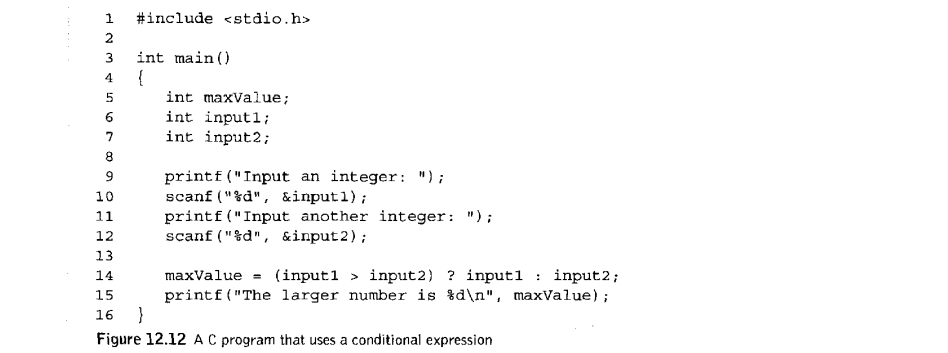

## 12.7 Summary
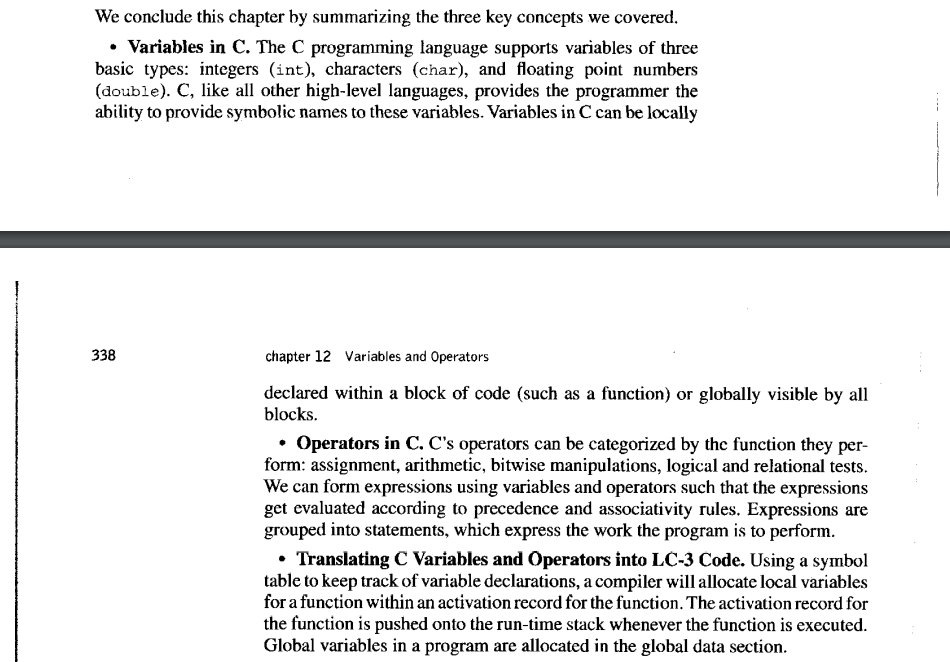